In [104]:
import pandas as pd
import numpy as np
import keras
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import itertools
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from imblearn.over_sampling import SMOTE

In [17]:
# loading the dataset to pandas datframe
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

Data Exploration

In [16]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [5]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
print("Number of Legit transactions: {}".format(len(data[data.Class == 0])))
print("Number of Fraudulent transactions: {}".format(len(data[data.Class == 1])))

Number of Legit transactions: 284315
Number of Fraudulent transactions: 492


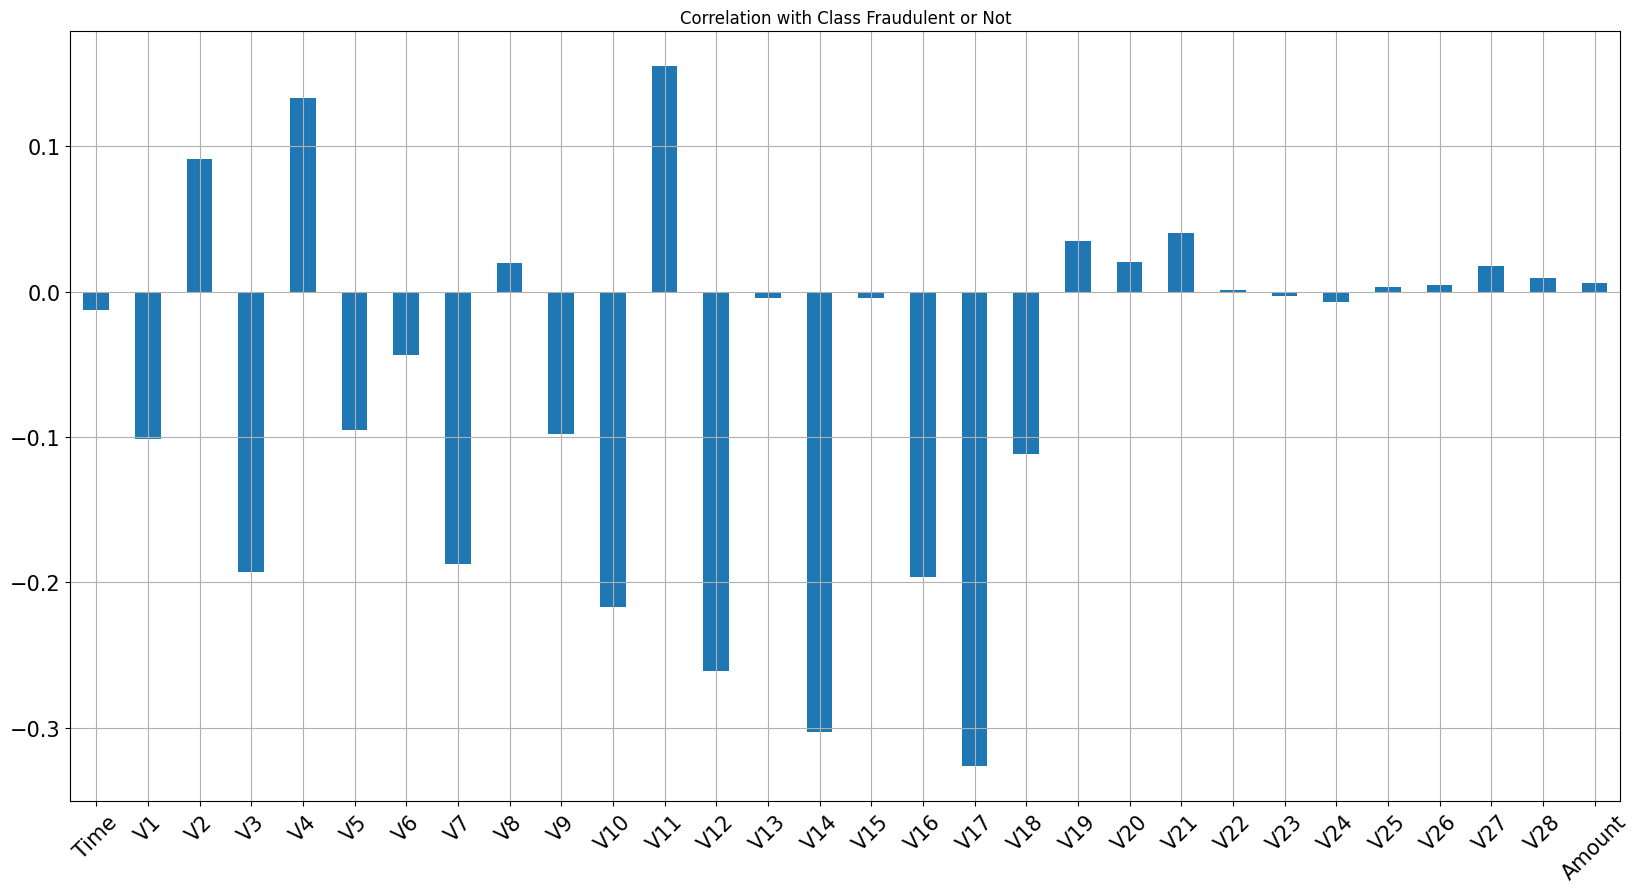

In [13]:
## Linear Correlation with Response Variable (Note: Models like RandomForest are not linear)
data2 = data.drop(columns = ['Class'])   # drop non numerical columns
data2.corrwith(data.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with Class Fraudulent or Not", fontsize = 15,
        rot = 45, grid = True)
plt.show()

In [18]:
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))  # Normalize 'Amount' in [-1,+1] range
data = data.drop(['Amount'],axis=1)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [19]:
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [20]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=2)

In [25]:
X_train.shape

(199364, 29)

In [26]:
X_test.shape

(85443, 29)

In [28]:
random_forest = RandomForestClassifier(n_estimators=100)

In [31]:
random_forest.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [37]:
X_train_prediction = random_forest.predict(X_train)
training_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy on Training data in Random Forest: ', training_accuracy)

Accuracy on Training data in Random Forest:  1.0


In [38]:
X_test_prediction = random_forest.predict(X_test)
testing_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy on Training data in Random Forest: ', testing_accuracy)

Accuracy on Training data in Random Forest:  0.9996137776061234


In [42]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[85302     7]
 [   26   108]]


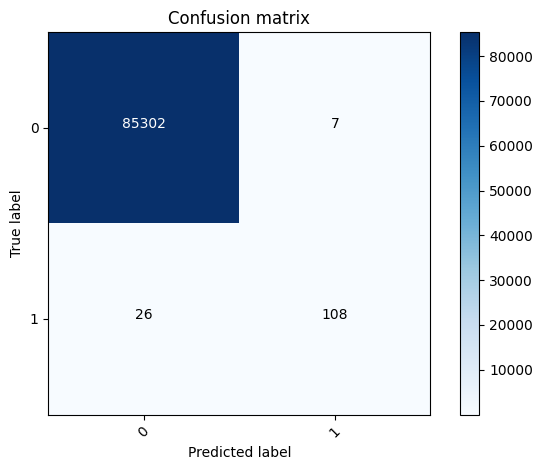

In [44]:
# Confusion matrix on the test dataset
cnf_matrix = confusion_matrix(y_test,X_test_prediction)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [52]:
prec = precision_score(y_test, X_test_prediction)
acc = accuracy_score(y_test, X_test_prediction)
rec = recall_score(y_test, X_test_prediction)
f1 = f1_score(y_test, X_test_prediction)
results_testset = pd.DataFrame([['RandomForest', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999614,0.19403,0.80597,0.93913,0.86747


Confusion matrix, without normalization
[[284308      7]
 [    26    466]]


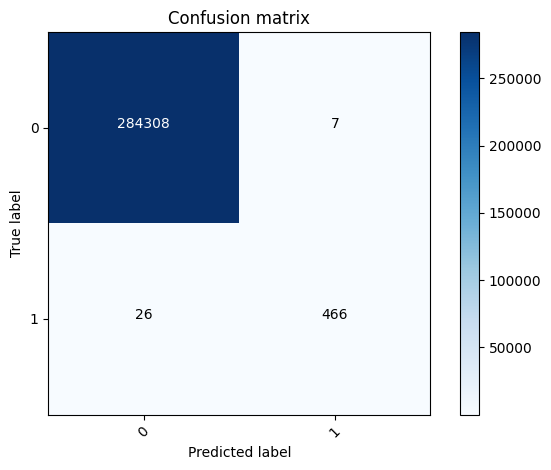

In [53]:
y_pred = random_forest.predict(X)
cnf_matrix = confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [54]:

acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
results_testset = pd.DataFrame([['RandomForest', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999884,0.052846,0.947154,0.985201,0.965803


Neural Network

In [55]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [57]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),   # input of 29 columns as shown above
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(24,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),                        # binary classification fraudulent or not
])

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 2113 (8.25 KB)
Trainable params: 2113 (8.2

In [59]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
13291/13291 [==============================] - 66s 5ms/step - loss: 0.0097 - accuracy: 0.9986
Epoch 2/5
13291/13291 [==============================] - 32s 2ms/step - loss: 0.0044 - accuracy: 0.9993
Epoch 3/5
13291/13291 [==============================] - 41s 3ms/step - loss: 0.0042 - accuracy: 0.9993
Epoch 4/5
13291/13291 [==============================] - 33s 2ms/step - loss: 0.0039 - accuracy: 0.9993
Epoch 5/5
13291/13291 [==============================] - 36s 3ms/step - loss: 0.0039 - accuracy: 0.9993


In [60]:
score = model.evaluate(X_test, y_test)
print(score)

2671/2671 [==============================] - 6s 2ms/step - loss: 0.0035 - accuracy: 0.9994
[0.003473336808383465, 0.999426543712616]


In [65]:
y_pred = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred[i]>0.5:
        y_pred[i]=1
    else:
        y_pred[i]=0
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))
y_test = pd.DataFrame(y_test)


2671/2671 [==============================] - 6s 2ms/step
Test Data Accuracy: 0.9994


Confusion matrix, without normalization
[[85292    17]
 [   32   102]]


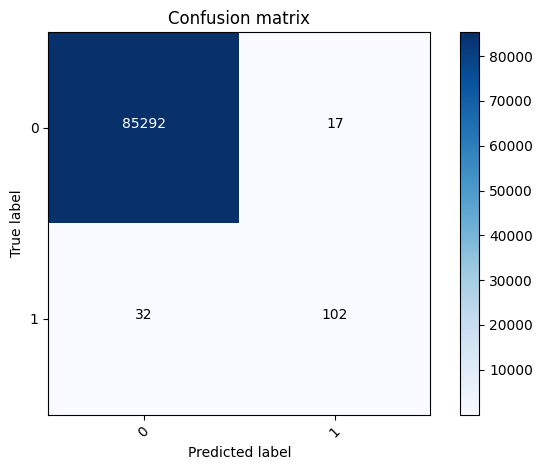

In [67]:
cnf_matrix = confusion_matrix(y_test, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [69]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())
model_results = pd.DataFrame([['PlainNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
model_results


,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,PlainNeuralNetwork,0.999427,0.238806,0.761194,0.857143,0.806324


8901/8901 [==============================] - 18s 2ms/step
Confusion matrix, without normalization
[[284252     63]
 [   113    379]]


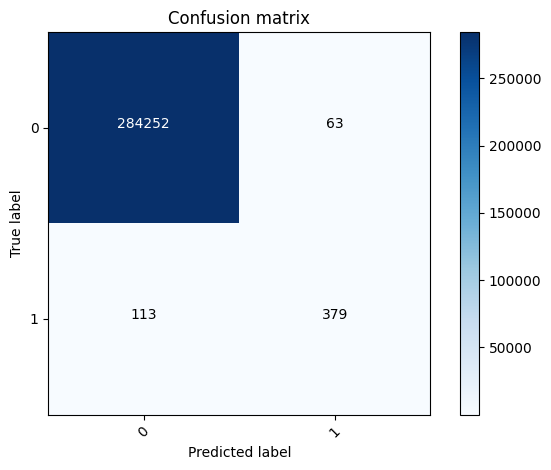

In [70]:
# Confusion matrix on the whole dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [71]:
acc = accuracy_score(y, y_pred.round())
prec = precision_score(y, y_pred.round())
rec = recall_score(y, y_pred.round())
f1 = f1_score(y, y_pred.round())
model_results = pd.DataFrame([['PlainNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
model_results

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,PlainNeuralNetwork,0.999382,0.229675,0.770325,0.857466,0.811563


Undersampling

In [73]:
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [75]:
data.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalizedAmount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,-0.000234
1,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,0.135382


In [86]:
legit_sample = legit.sample(n=492)

In [87]:
new_data = pd.concat([legit_sample, fraud], axis=0)

In [88]:
new_data['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [89]:
new_data.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalizedAmount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.087108,-0.060465,0.105713,-0.058813,-0.072062,-0.032695,-0.068101,0.030009,0.149582,0.001557,...,-0.000354,-0.001867,-0.043779,-0.004362,0.012338,0.025869,-0.009156,-0.012811,-0.007633,-0.015378
1,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,0.135382


In [90]:
X_undersample = new_data.drop(columns='Class', axis=1)
Y_undersample = new_data['Class']

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
172820,1.771506,-1.799459,-2.337457,-2.689723,-0.662500,-1.158087,0.086542,-0.327213,0.656922,-0.288300,...,-0.060163,-0.067604,-0.108175,0.684201,0.207072,-0.770566,-0.020927,-0.023182,0,0.606151
68227,-0.420228,1.397354,0.427220,0.647531,-0.375950,0.366535,-1.580594,-4.185242,-0.428436,-0.783169,...,0.039157,-0.794075,0.372120,-0.005726,0.173893,0.225815,0.175856,0.293017,0,-0.349671
150896,1.835786,0.376770,0.723936,3.878882,-0.158077,0.966765,-0.861031,0.212896,0.740724,1.095263,...,-0.094019,0.104504,0.289359,-0.419345,-0.479005,-0.225808,0.012547,-0.038515,0,-0.353229
49859,1.257807,0.355811,0.306703,0.693044,-0.372561,-1.074060,0.084595,-0.202709,0.035083,-0.281813,...,-0.288266,-0.830822,0.130276,0.344876,0.215803,0.094543,-0.023030,0.030651,0,-0.349271
68234,-1.017883,0.254338,2.165488,2.647700,1.096038,0.004497,-0.294449,0.345965,-1.284601,0.486622,...,0.178281,0.298411,0.239105,0.071747,-0.713274,-0.029045,0.162121,0.178472,0,-0.350151


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample,Y_undersample, test_size=0.3)

In [93]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [95]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 2113 (8.25 KB)
Trainable params: 2113 (8.2

In [96]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
46/46 [==============================] - 4s 7ms/step - loss: 0.1984 - accuracy: 0.9622
Epoch 2/5
46/46 [==============================] - 0s 6ms/step - loss: 0.1886 - accuracy: 0.9666
Epoch 3/5
46/46 [==============================] - 0s 5ms/step - loss: 0.1829 - accuracy: 0.9695
Epoch 4/5
46/46 [==============================] - 0s 10ms/step - loss: 0.1674 - accuracy: 0.9680
Epoch 5/5
46/46 [==============================] - 0s 5ms/step - loss: 0.1612 - accuracy: 0.9724


10/10 [==============================] - 0s 3ms/step
Confusion matrix, without normalization
[[138   2]
 [ 12 144]]


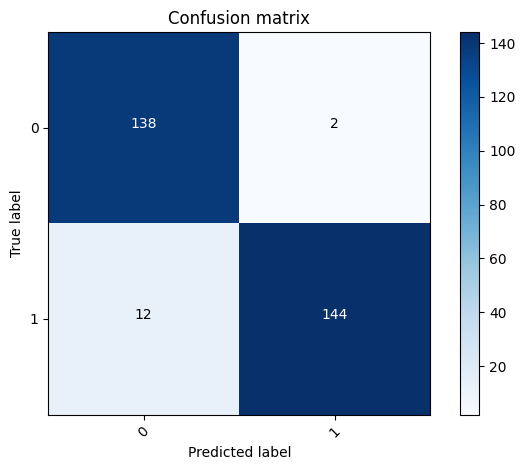

In [97]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [98]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

In [99]:
model_results = pd.DataFrame([['UnderSampledNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
model_results

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,UnderSampledNeuralNetwork,0.952703,0.076923,0.923077,0.986301,0.953642


8901/8901 [==============================] - 25s 3ms/step
Confusion matrix, without normalization
[[278408   5907]
 [    27    465]]


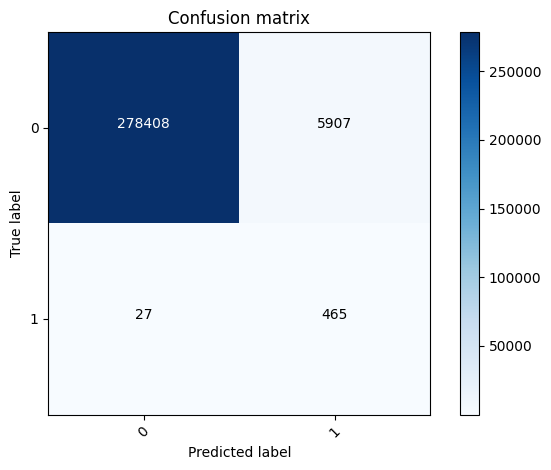

In [100]:
# on whole dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()


In [101]:
acc = accuracy_score(y, y_pred.round())
prec = precision_score(y, y_pred.round())
rec = recall_score(y, y_pred.round())
f1 = f1_score(y, y_pred.round())

In [102]:
model_results = pd.DataFrame([['UnderSampledNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
model_results

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,UnderSampledNeuralNetwork,0.979165,0.054878,0.945122,0.072976,0.13549


Oversampling technique using SMOTE

In [106]:
X_resample, y_resample = SMOTE().fit_resample(X,y.values.ravel())

In [107]:
y_resample

array([0, 0, 0, ..., 1, 1, 1])

In [108]:
print('Number of total transactions before SMOTE upsampling: ', len(y), '...after SMOTE upsampling: ', len(y_resample))
print('Number of fraudulent transactions before SMOTE upsampling: ', len(y[y.Class==1]),
      '...after SMOTE upsampling: ', np.sum(y_resample[y_resample==1]))

Number of total transactions before SMOTE upsampling:  284807 ...after SMOTE upsampling:  568630
Number of fraudulent transactions before SMOTE upsampling:  492 ...after SMOTE upsampling:  284315


In [109]:

y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)

In [111]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [112]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),   # input of 29 columns as shown above
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(24,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),                        # binary classification fraudulent or not
])

In [113]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
26537/26537 [==============================] - 114s 4ms/step - loss: 0.0462 - accuracy: 0.9836
Epoch 2/5
26537/26537 [==============================] - 84s 3ms/step - loss: 0.0195 - accuracy: 0.9946
Epoch 3/5
26537/26537 [==============================] - 66s 2ms/step - loss: 0.0146 - accuracy: 0.9962
Epoch 4/5
26537/26537 [==============================] - 68s 3ms/step - loss: 0.0121 - accuracy: 0.9969
Epoch 5/5
26537/26537 [==============================] - 69s 3ms/step - loss: 0.0102 - accuracy: 0.9975


5331/5331 [==============================] - 8s 1ms/step
Confusion matrix, without normalization
[[85189   376]
 [  128 84896]]


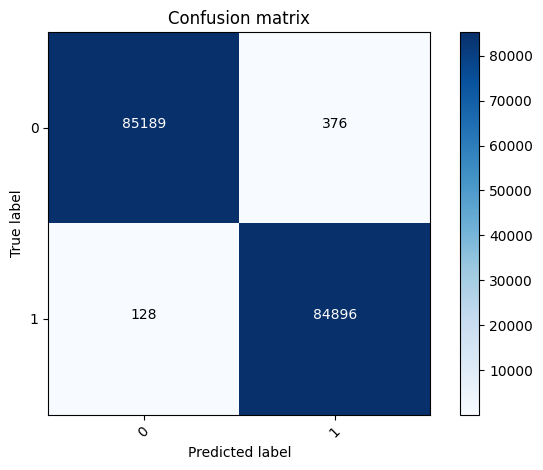

In [114]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [115]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

In [116]:
model_results = pd.DataFrame([['OverSampledNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
model_results

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,OverSampledNeuralNetwork,0.997046,0.001505,0.998495,0.995591,0.99704


8901/8901 [==============================] - 18s 2ms/step
Confusion matrix, without normalization
[[283190   1125]
 [     4    488]]


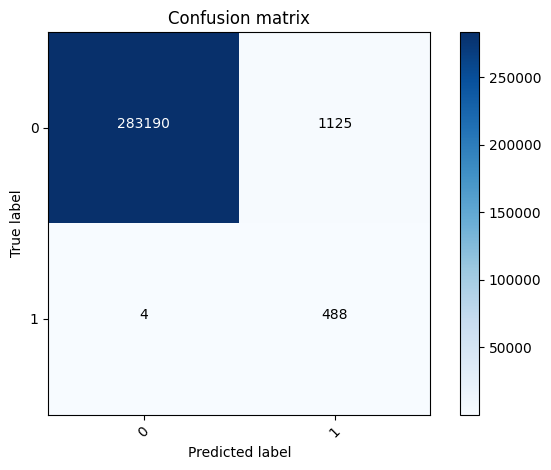

In [117]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [118]:

acc = accuracy_score(y, y_pred.round())
prec = precision_score(y, y_pred.round())
rec = recall_score(y, y_pred.round())
f1 = f1_score(y, y_pred.round())

In [119]:

model_results = pd.DataFrame([['OverSampledNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
model_results

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,OverSampledNeuralNetwork,0.996036,0.00813,0.99187,0.302542,0.463658
